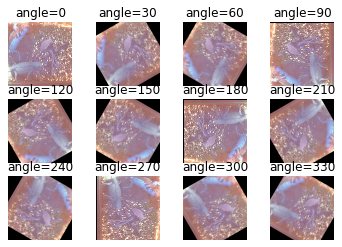

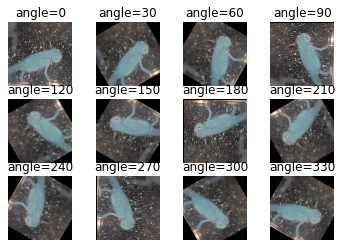

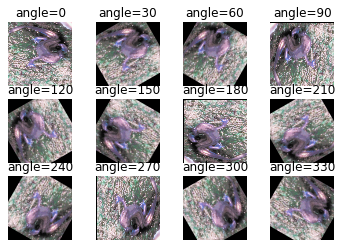

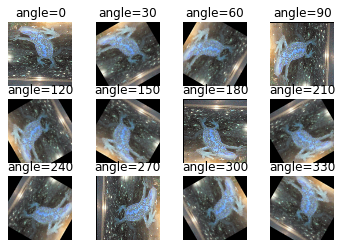

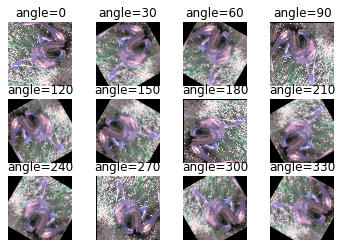

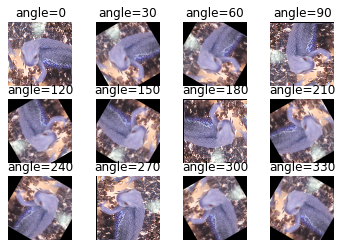

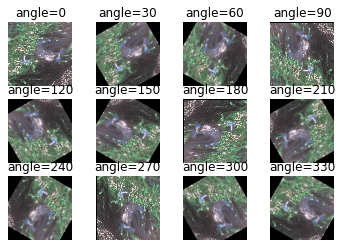

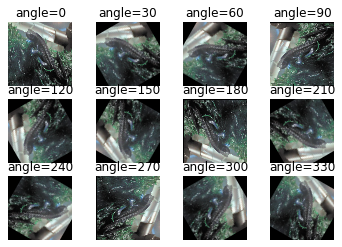

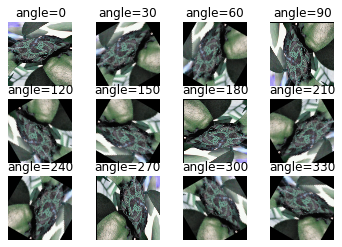

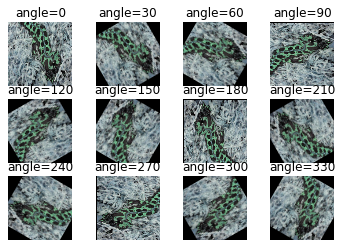

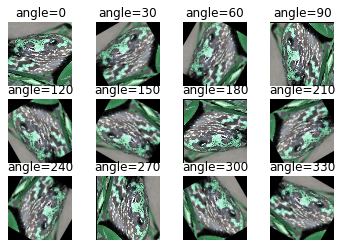

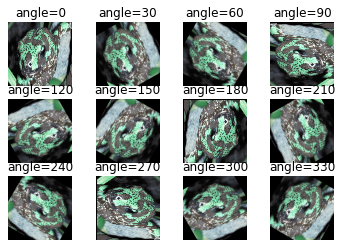

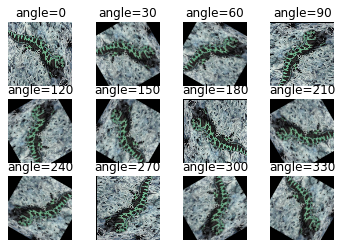

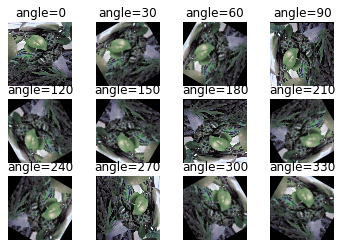

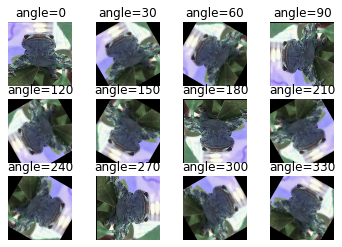

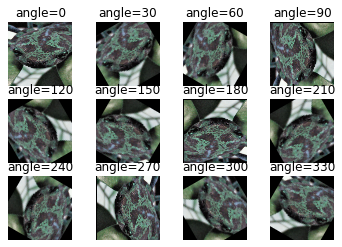

In [12]:
import cv2
import numpy as np
from glob import glob
import pdb
import copy
import matplotlib.pyplot as plt

np.random.seed(0)

num_classes = 2
img_height, img_width = 64, 64

CLS = ['akahara', 'madara']

# get train data
def data_load(path,hf=False,vf=False,rot=False):
    xs = []
    ts = []
    paths = []
    
    for dir_path in glob(path + '/*'):
        for path in glob(dir_path + '/*'):
            x = cv2.imread(path)
            x = cv2.resize(x, (img_width, img_height)).astype(np.float32)
            x /= 255.
            xs.append(x)

            for i, cls in enumerate(CLS):
                if cls in path:
                    t = i
            
            ts.append(t)

            paths.append(path)
            
            if hf:
                xs.append(x[:,::-1])
                ts.append(t)
                paths.append(path)
                
            if vf:
                xs.append(x[::-1])
                ts.append(t)
                paths.append(path)
                
            if hf and vf:
                xs.append(x[::-1,::-1])
                ts.append(t)
                paths.append(path)
                
            if rot != False:
                angle = rot
                scale = 1
                
                a_num = 360//rot
                w_num = np.ceil(np.sqrt(a_num))
                h_num = np.ceil(a_num / w_num)
                count = 1
                plt.subplot(h_num,w_num,count)
                plt.axis("off")
                plt.imshow(x)
                plt.title("angle=0")
                
                while angle < 360:
                    _h,_w,_c = x.shape
                    max_side = max(_h,_w)
                    tmp = np.zeros((max_side,max_side,_c))
                    tx = int((max_side - _w)/2)
                    ty = int((max_side - _h)/2)
                    tmp[ty:ty+_h, tx:tx+_w] = x.copy()
                    M = cv2.getRotationMatrix2D((max_side/2,max_side/2),angle,scale)
                    _x = cv2.warpAffine(tmp,M,(max_side,max_side))
                    _x = _x[tx:tx+_w, ty:ty+_h]
                    xs.append(x)
                    ts.append(t)
                    paths.append(path)
                    
                    count += 1
                    plt.subplot(h_num,w_num, count)
                    plt.imshow(_x)
                    plt.axis("off")
                    plt.title("angle={}".format(angle))
                    
                    angle += rot
                plt.show()
                    
    xs = np.array(xs, dtype=np.float32)
    ts = np.array(ts, dtype=np.int)
#     pdb.set_trace()
    xs = xs.transpose(0,3,1,2)

    return xs, ts, paths

xs, ts, paths = data_load("Dataset/train/images/",hf=True,vf=True,rot=30)

In [13]:
!pwd

/home/m-shiota/projects/MICRESEARCH/testscripts/Unet-test


In [14]:
mb = 3
mbi = 0
train_ind = np.arange(len(xs))
np.random.seed(0)
np.random.shuffle(train_ind)

epoch_max = 3
epoch = 0

while epoch < epoch_max:
    if mbi + mb > len(xs):
        mb_ind = copy.copy(train_ind)[mbi:]
        np.random.shuffle(train_ind)
        mb_ind = np.hstack((mb_ind, train_ind[:(mb-(len(xs)-mbi))]))
        epoch += 1
        mbi = mb - (len(xs) - mbi)
    else:
        mb_ind = train_ind[mbi: mbi+mb]
        mbi += mb

    print(mb_ind)

[109  71  37]
[ 74 108 227]
[156 220 152]
[194  76 202]
[ 83 157 234]
[134 184 111]
[221   8 101]
[179  89 122]
[  5  22 199]
[ 97  12 166]
[ 55  44 149]
[125 144 118]
[145 170  64]
[ 92 154  45]
[219  18 106]
[ 15 104   7]
[110 239  63]
[153 233 139]
[ 96  33 231]
[158 116 168]
[ 75 215  90]
[230 201 155]
[ 16 218 129]
[ 73   4 107]
[ 61 210  52]
[ 66  26 176]
[162 213  40]
[ 13   3 226]
[ 24  30 214]
[ 60  56 130]
[136  19 178]
[161  54 191]
[ 80  51 171]
[181 124  86]
[126 135 169]
[123  41  14]
[ 27  50 217]
[ 20 159  46]
[188 235 138]
[209  62 206]
[  2  59 146]
[223  43 187]
[ 10 137 189]
[112 173  98]
[150  93 160]
[229 113   0]
[94 95 69]
[49 48 85]
[237 141  23]
[143  78 100]
[131 205 238]
[ 6 68 84]
[121 224 180]
[203 198 182]
[ 91 204  11]
[119 102  35]
[57 65  1]
[120 190  42]
[105 132 207]
[ 17  38 133]
[ 53 164 186]
[128  34  28]
[183 114 163]
[151  31 196]
[127 185 212]
[222  32 167]
[142 200 147]
[ 29 177  99]
[ 82 236 175]
[ 79 197 208]
[115 148 232]
[72 77 25]
[165  8